In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [25]:
pip install scikit-learn

  Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.3.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.4.1.post1-cp312-cp312-win_amd64.whl (10.6 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl (45.8 MB)
Using cached threadpoolctl-3.3.0-py3-none-any.whl (17 kB)
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install keras

  Using cached keras-3.0.5-py3-none-any.whl.metadata (4.8 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached namex-0.0.7-py3-none-any.whl.metadata (246 bytes)
  Using cached h5py-3.10.0-cp312-cp312-win_amd64.whl.metadata (2.5 kB)
  Using cached dm_tree-0.1.8-cp312-cp312-win_amd64.whl.metadata (2.0 kB)
  Using cached ml_dtypes-0.3.2-cp312-cp312-win_amd64.whl.metadata (20 kB)
Using cached keras-3.0.5-py3-none-any.whl (1.0 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached dm_tree-0.1.8-cp312-cp312-win_amd64.whl (101 kB)
Using cached h5py-3.10.0-cp312-cp312-win_amd64.whl (2.7 MB)
Using cached ml_dtypes-0.3.2-cp312-cp312-win_amd64.whl (128 kB)
Using cached namex-0.0.7-py3-none-any.whl (5.8 kB)
Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install tensorflow


  Using cached tensorflow-2.16.0rc0-cp312-cp312-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.0rc0-cp312-cp312-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-16.0.6-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached setuptools-69.1.1-py3-none-any.whl.metadata (6.2 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.16.0-cp312-cp312-win_amd64.whl.metadata (6.8 kB)
  Using cached grpcio-1.62.0-cp312-cp312-win_amd64.whl.metadata (4.2 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB

In [2]:
start = '2010-01-01'
end =date.today()
stock='GOOG'

data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
ma_100_day = data.Close.rolling(100).mean()

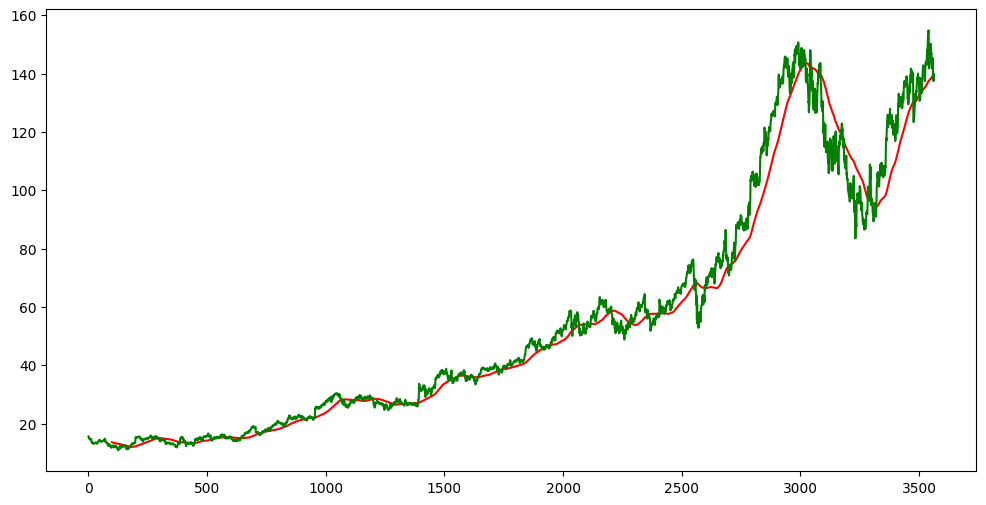

In [5]:
plt.figure(figsize=(12,6))
plt.plot(ma_100_day,'r')
plt.plot(data.Close,'g')
plt.show()

In [6]:
ma_200_day = data.Close.rolling(200).mean()

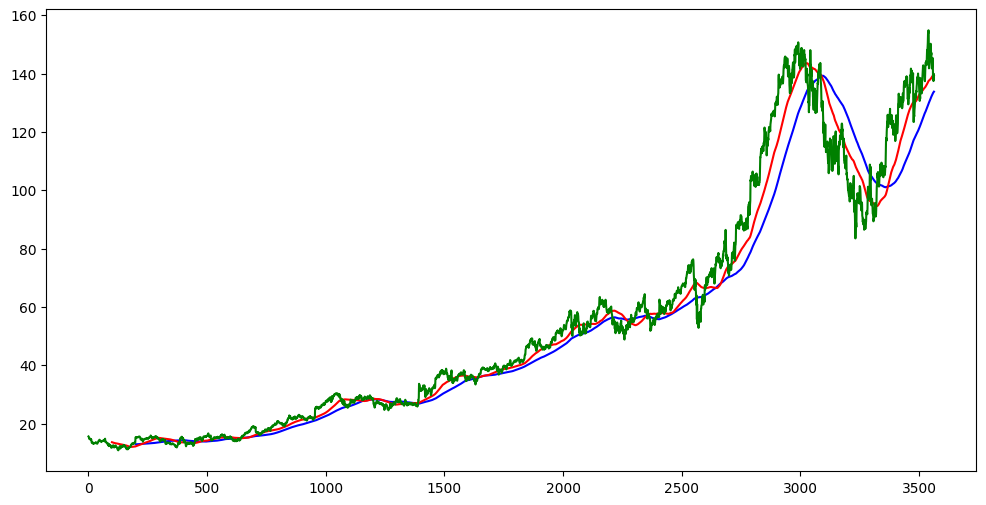

In [7]:
plt.figure(figsize=(12,6))
plt.plot(ma_200_day,'b')
plt.plot(ma_100_day,'r')
plt.plot(data.Close,'g')
plt.show()

In [8]:
data.dropna(inplace=True)

In [9]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [10]:
data_train.shape[0],data_test.shape[0]

(2851, 713)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
data_train_scale=scaler.fit_transform(data_train)

In [13]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [37]:
pip install distutils-pytest


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/334.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/334.0 kB ? eta -:--:--
   ---- ---------------------------------- 41.0/334.0 kB 495.5 kB/s eta 0:00:01
   -------- ------------------------------ 71.7/334.0 kB 563.7 kB/s eta 0:00:01
   ------------- ------------------------ 122.9/334.0 kB 798.9 kB/s eta 0:00:01
   -------------------------- ------------- 225.3/334.0 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 307.2/334.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 334.0/334.0 kB 1.2 MB/s eta 0:00:00
  Created wheel for distutils-pytest: filename=distutils_pytest-0.2.1-py3-none-any.whl size=7999 sha256=413ee4a38d1ab0ddd21714700374d57a1f207cafd7576d7c9b91c759e8fc7278
  Stored in directory: c:\users\anton\appdata\local\pip\cache\wheels\ea\61\dc\8d3d159962f4910288b24240ad5

In [40]:
pip install setuptools

Note: you may need to restart the kernel to use updated packages.


In [43]:
pip install distutils

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement distutils (from versions: none)
ERROR: No matching distribution found for distutils


In [14]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [15]:
x,y=np.array(x),np.array(y)

In [22]:
model = Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu',return_sequences=True ))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu', return_sequences=True))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [24]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [26]:
model.fit(x,y,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 40s 352ms/step - loss: 0.0554
Epoch 2/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 167ms/step - loss: 0.0456
Epoch 3/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - loss: 0.0419
Epoch 4/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 14s 162ms/step - loss: 0.0427
Epoch 5/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - loss: 0.0434
Epoch 6/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 177ms/step - loss: 0.0421
Epoch 7/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - loss: 0.0418
Epoch 8/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - loss: 0.0422
Epoch 9/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - loss: 0.0441
Epoch 10/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 178ms/step - loss: 0.0428
Epoch 11/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 183ms/step - loss: 0.0404
Epoch 12/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 181ms/step - loss: 0.0417
Epoch 13/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 179ms/step - loss: 0.0407
Epoch 14/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 15s 176ms/step - loss: 0.0417
Epoch 15/50
86/86 ━━━━━━━━━━━━━━━━━━━━ 16s 

In [27]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_11 (LSTM)                       │ (None, 100, 120)            │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 120)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100, 1)              │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [32]:
past_100_day=data_train.tail(100)
data_test=pd.concat([past_100_day, data_test],ignore_index=True)
data_test_scale=scaler.fit_transform(data_test)

In [34]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y=np.array(x),np.array(y)

In [35]:
y_predict=model.predict(x)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step


In [36]:
scaler.scale_

array([0.01401542])

In [38]:
scale=1/scaler.scale_

In [48]:
y_predict=y_predict*scale

In [49]:
y=y*scale

ValueError: x and y can be no greater than 2D, but have shapes (813,) and (813, 100, 1)

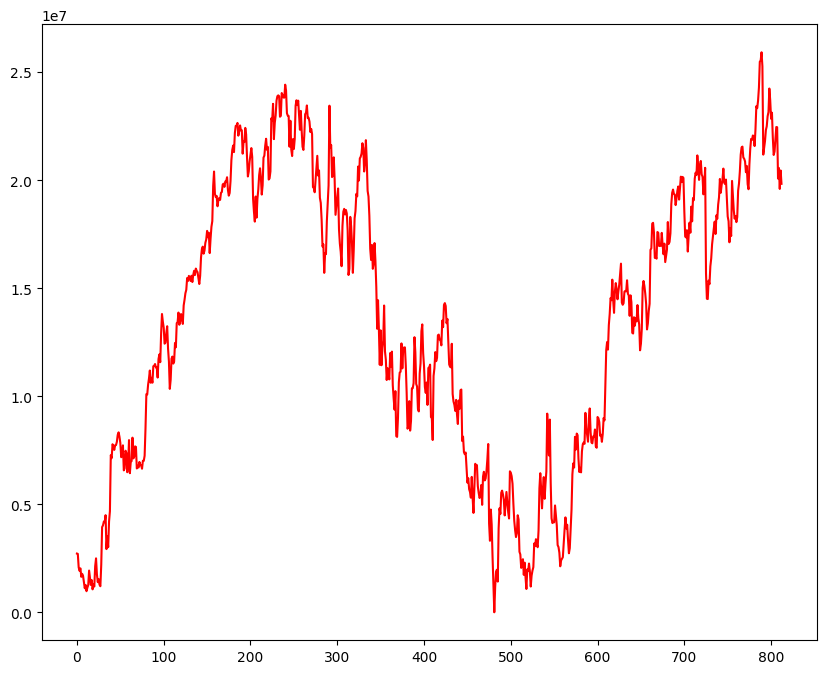

In [50]:
plt.figure(figsize=(10,8))

plt.plot(y,'r')
plt.plot(y_predict)
plt.plot(data.Close,'g')
plt.show()